<a href="https://colab.research.google.com/github/YovanArdiyanto/Progam_python/blob/main/PERTEMUAN_11_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [141]:
ls

 1.jpg   3.jpg     4.jpg   6.jpg   nnmodel2_scene/  'PERTEMUAN 11 python.ipynb'
 2.jpg   3Scene/   5.jpg   7.jpg   nnmodel_scene/


In [142]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [143]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3Scene")
data = []
labels = []

[INFO] loading images...


In [144]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [145]:
print(labels)

['GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08',

In [146]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [147]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [148]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(259, 64, 64, 3)
(87, 64, 64, 3)


In [149]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [150]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [151]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [152]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [153]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
9/9 [==============================] - 0s 18ms/step - loss: 1.1211 - accuracy: 0.3436 - val_loss: 1.0029 - val_accuracy: 0.4943
Epoch 2/25
9/9 [==============================] - 0s 6ms/step - loss: 0.9775 - accuracy: 0.5830 - val_loss: 0.9206 - val_accuracy: 0.6207
Epoch 3/25
9/9 [==============================] - 0s 6ms/step - loss: 0.9173 - accuracy: 0.5483 - val_loss: 0.8321 - val_accuracy: 0.6667
Epoch 4/25
9/9 [==============================] - 0s 6ms/step - loss: 0.7621 - accuracy: 0.6950 - val_loss: 0.7164 - val_accuracy: 0.6322
Epoch 5/25
9/9 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.7181 - val_loss: 0.6339 - val_accuracy: 0.6782
Epoch 6/25
9/9 [==============================] - 0s 6ms/step - loss: 0.5521 - accuracy: 0.7915 - val_loss: 0.6213 - val_accuracy: 0.7126
Epoch 7/25
9/9 [==============================] - 0s 6ms/step - loss: 0.5462 - accuracy: 0.7838 - val_loss: 0.5655 - val_accuracy: 0.7471
Epoch 8/25
9/9 [=================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


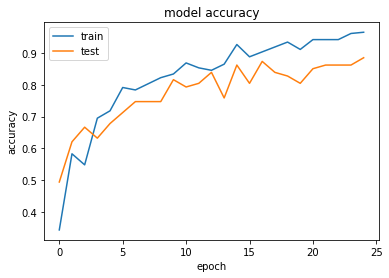

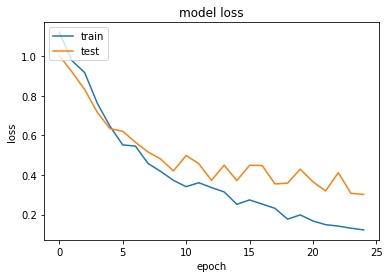

In [154]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [155]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.88      0.79      0.84        29
      GMB_02       0.84      0.91      0.87        23
      GMB_08       0.92      0.94      0.93        35

    accuracy                           0.89        87
   macro avg       0.88      0.88      0.88        87
weighted avg       0.89      0.89      0.88        87



In [159]:
model.save('nnmodel1_scene')

INFO:tensorflow:Assets written to: nnmodel1_scene/assets


In [181]:
import cv2
import matplotlib.pyplot as plt
image1='5.jpg'

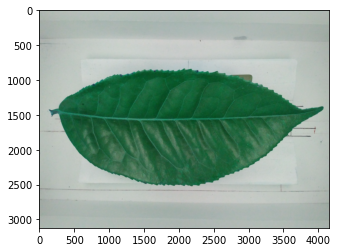

In [182]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [183]:
image_testing = Image.open('5.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [184]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [185]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.1405329  0.62671375 0.23275334]]
['GMB_02']
